# Red Wine Quality Prediction Project

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [16]:
df=pd.read_csv("C:\\Users\HP\Downloads\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1415,6.2,0.58,0.00,1.6,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,5
725,9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.99760,3.29,0.55,10.4,5
1211,6.6,0.44,0.15,2.1,0.076,22.0,53.0,0.99570,3.32,0.62,9.3,5
800,7.2,0.61,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.4,5
716,8.0,0.43,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4,5
1190,9.1,0.40,0.57,4.6,0.080,6.0,20.0,0.99652,3.28,0.57,12.5,6
1431,7.6,0.43,0.31,2.1,0.069,13.0,74.0,0.99580,3.26,0.54,9.9,6
414,8.8,0.52,0.34,2.7,0.087,24.0,122.0,0.99820,3.26,0.61,9.5,5
1325,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
789,8.6,0.63,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3,5


# Exploratry Data Analysis (EDA)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Here 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' are the dependent veriables and 'quality' is independent it means target variable

In [8]:
df.shape

(1599, 12)

There is tottal 1599 rows and 12 columns present

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All columns have numerical values.

In [10]:
# Checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

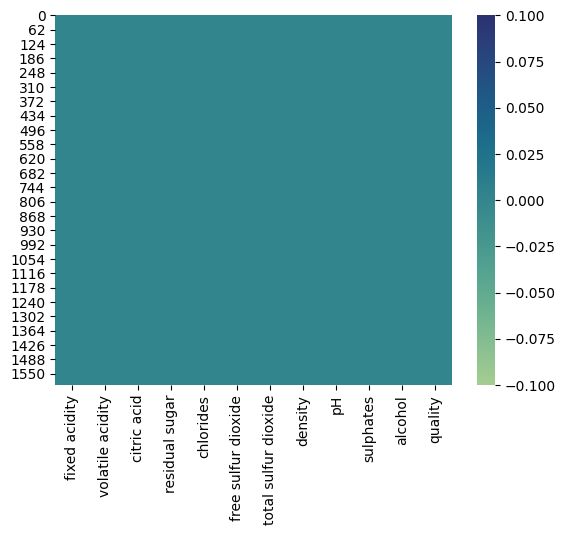

In [11]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull(),cmap="crest",)

There is no null value present in dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Overview of the dataframe

# Data Visualaization and Analysis

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


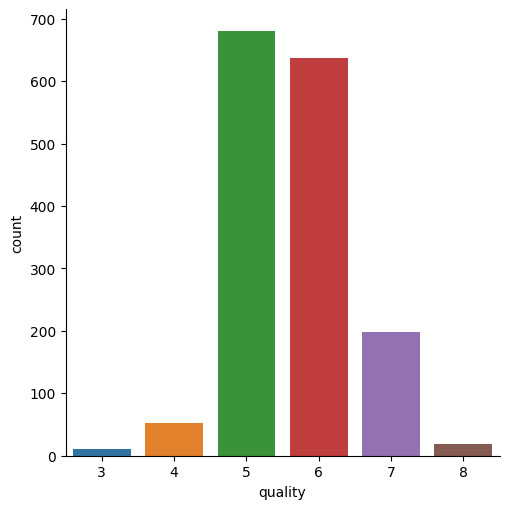

In [14]:
sns.catplot(x="quality",data=df,kind="count")
plt.show()

There is total 6 numbers of Wine Quality and quality 5 and 6 are the highest in numbers, and quality 3 is much lower in count.

# Checking quality through columns

[]

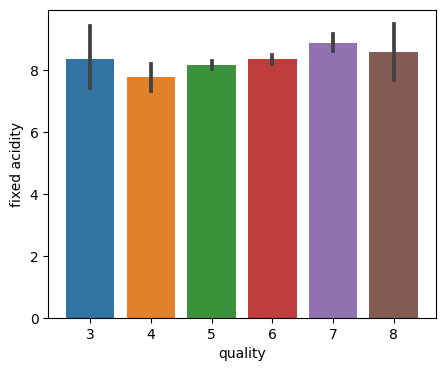

In [15]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="fixed acidity",data=df)
plt.plot()

[]

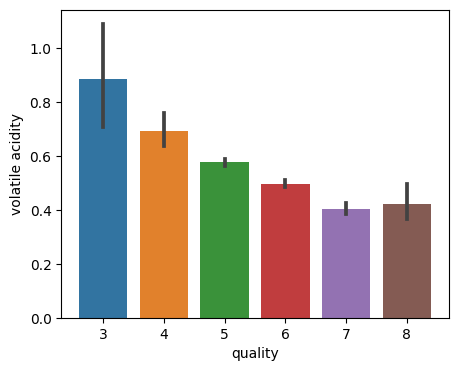

In [16]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="volatile acidity",data=df)
plt.plot()

Voilatile acidity is high then the quality is low

[]

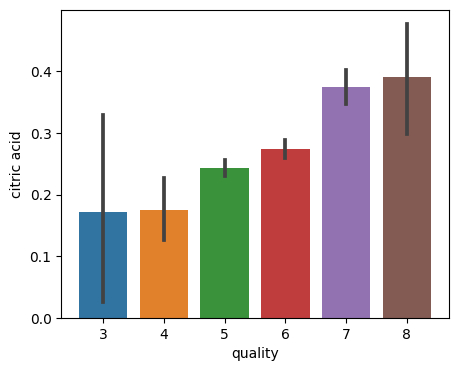

In [17]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="citric acid",data=df)
plt.plot()

citric acid is high it means quality is high

[]

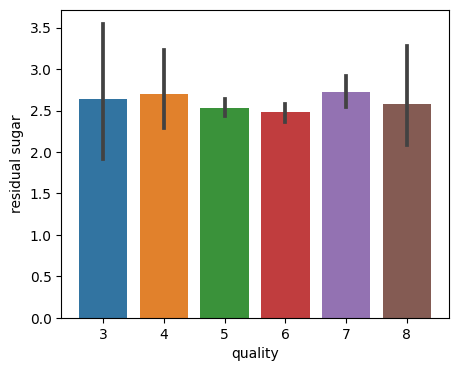

In [18]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="residual sugar",data=df)
plt.plot()

residual sugar is in near 2.5 donating higher quality

[]

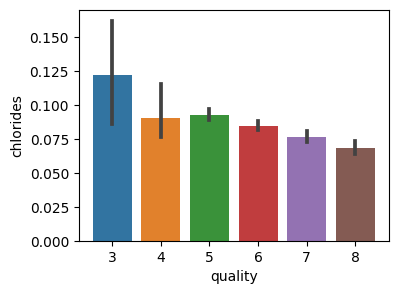

In [19]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x="quality",y="chlorides",data=df)
plt.plot()

Chlorides in between range 0.6 to 0.8 quality is best and as it increases, the quality will decrease

[]

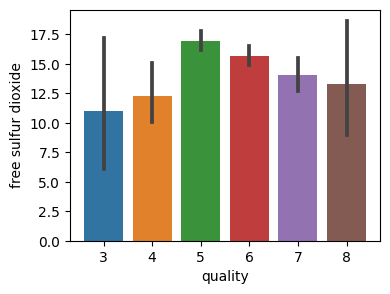

In [20]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x="quality",y="free sulfur dioxide",data=df)
plt.plot()

free sulfur dioxide is in 12.5 donating quality is best

[]

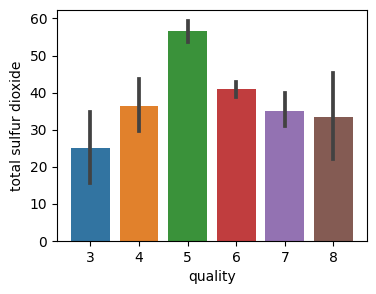

In [21]:
plot = plt.figure(figsize=(4,3))
sns.barplot(x="quality",y="total sulfur dioxide",data=df)
plt.plot()

total sulfur dioxide in range of 35 donates excellent quality and if it increases or decreases then quality will decrease

[]

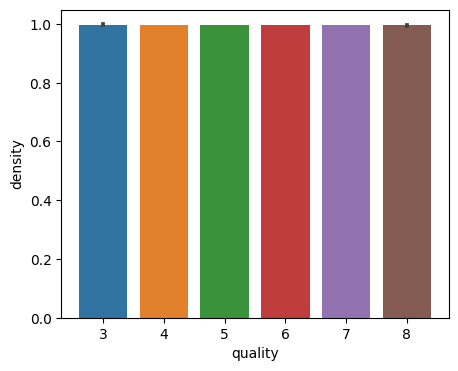

In [23]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="density",data=df)
plt.plot()

Density has no effect on quality so we drop it

In [24]:
df= df.drop("density",axis=1)

[]

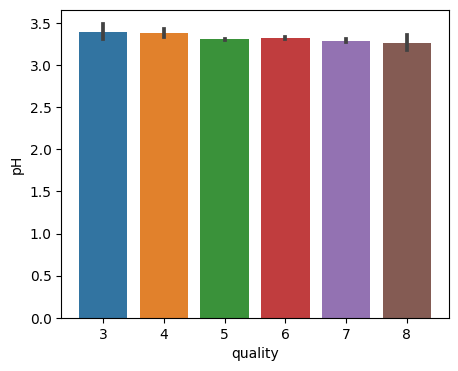

In [25]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="pH",data=df)
plt.plot()

pH values doesnot effect much on quality so we also drop it

In [26]:
df= df.drop("pH",axis=1)

[]

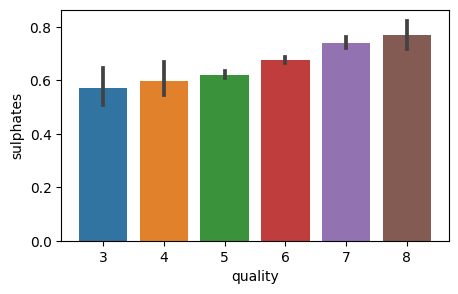

In [28]:
plot = plt.figure(figsize=(5,3))
sns.barplot(x="quality",y="sulphates",data=df)
plt.plot()

increase in sulphates also causes increase in quality

[]

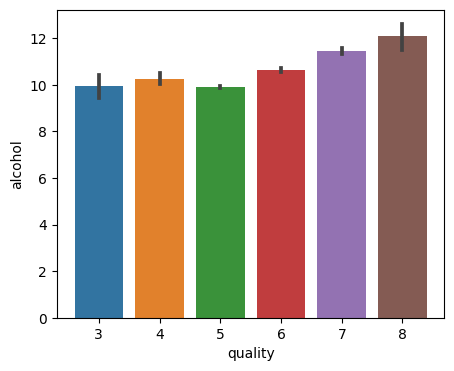

In [30]:
plot = plt.figure(figsize=(5,4))
sns.barplot(x="quality",y="alcohol",data=df)
plt.plot()

increase in Alcohol causes quality to increase

In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

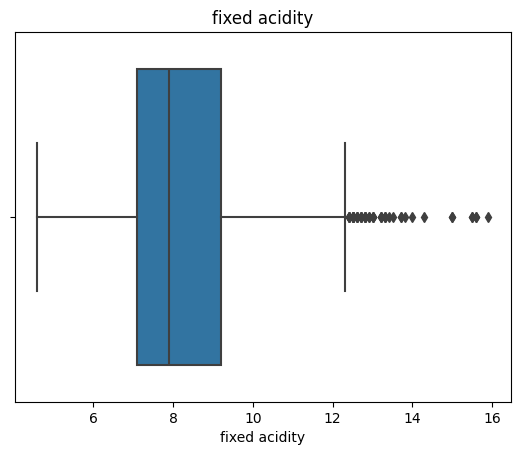

In [33]:
sns.boxplot(x=df["fixed acidity"])
plt.title("fixed acidity")
plt.show()

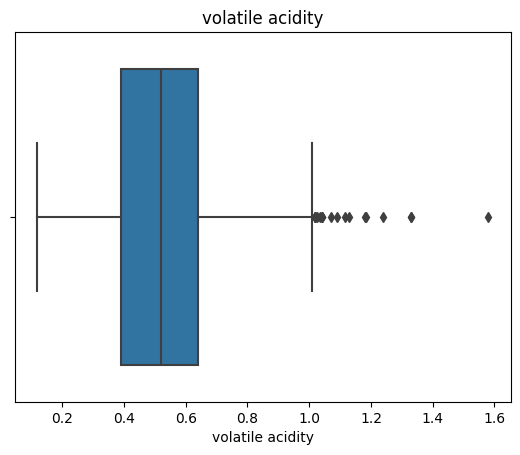

In [34]:
sns.boxplot(x=df["volatile acidity"])
plt.title("volatile acidity")
plt.show()

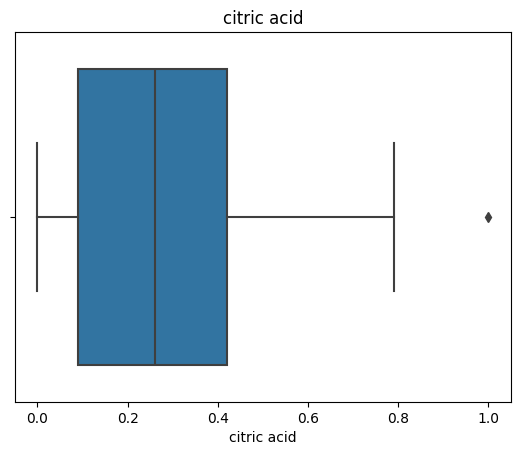

In [35]:
sns.boxplot(x=df["citric acid"])
plt.title("citric acid")
plt.show()

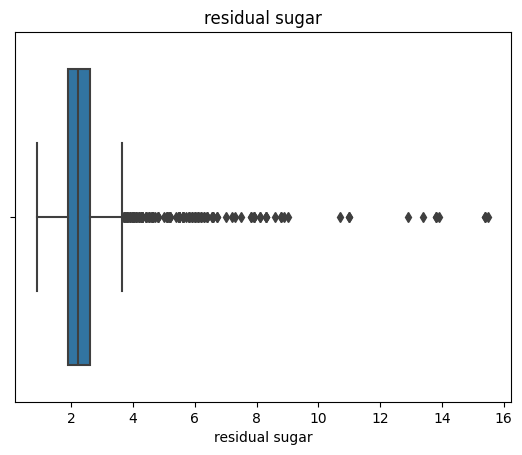

In [36]:
sns.boxplot(x=df["residual sugar"])
plt.title("residual sugar")
plt.show()

treated outliers for residual sugar

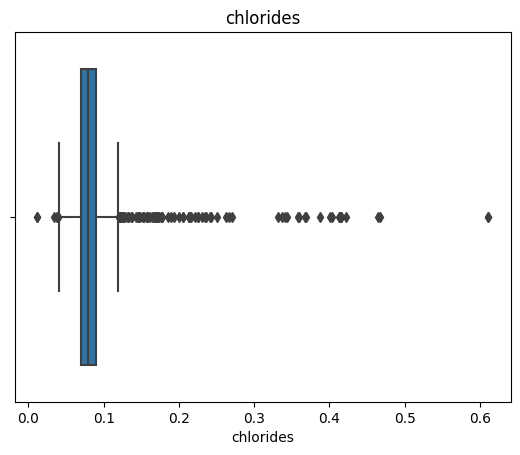

In [37]:
sns.boxplot(x=df["chlorides"])
plt.title("chlorides")
plt.show()

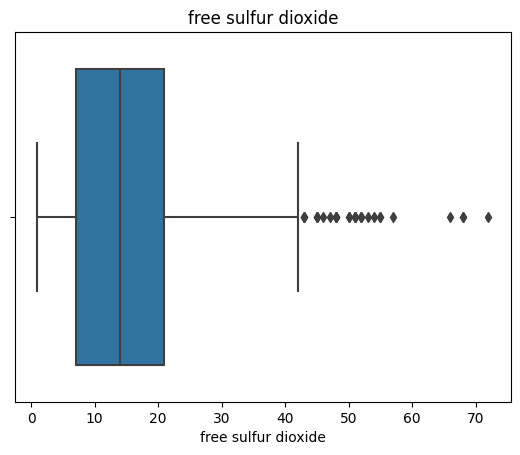

In [38]:
sns.boxplot(x=df["free sulfur dioxide"])
plt.title("free sulfur dioxide")
plt.show()

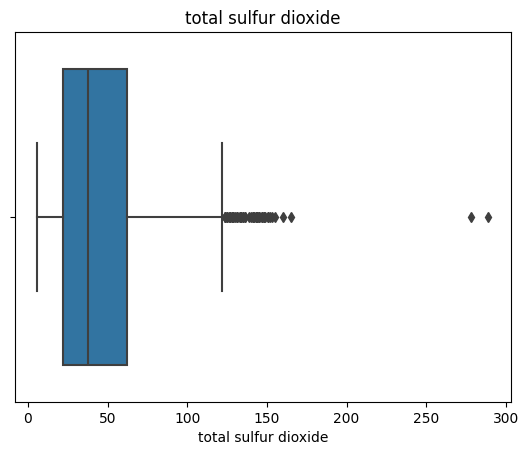

In [39]:
sns.boxplot(x=df["total sulfur dioxide"])
plt.title("total sulfur dioxide")
plt.show()

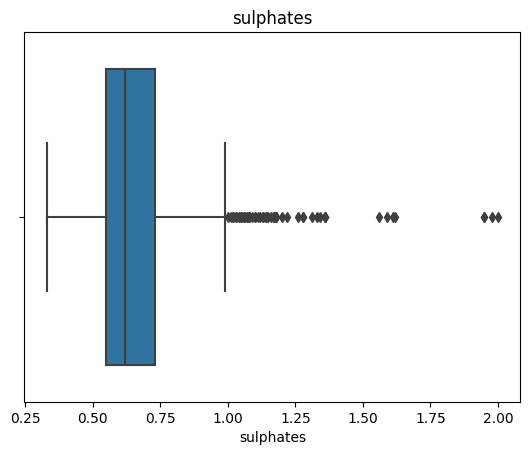

In [40]:
sns.boxplot(x=df["sulphates"])
plt.title("sulphates")
plt.show()

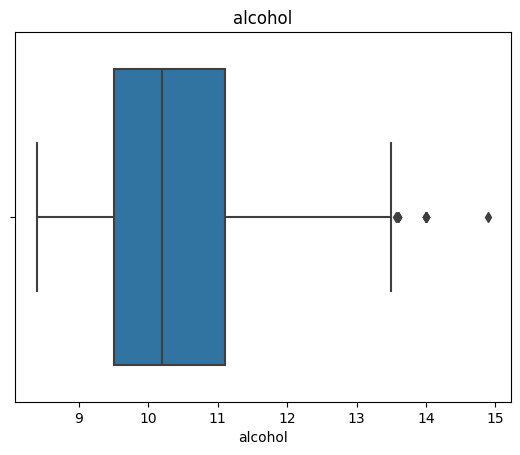

In [41]:
sns.boxplot(x=df["alcohol"])
plt.title("alcohol")
plt.show()

Some outliers found in each column

# Removing found outliers

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3

In [44]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
        120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
        169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
        274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        391,  396,  396,  400,  400,  442,  451,  459,  467,  480,  494,
        515,  517,  544,  554,  555,  557,  568,  584,  588,  591,  595,
        614,  636,  639,  649,  649,  651,  652,  652,  652,  672,  672,
        684,  690,  690,  692,  692,  723,  724,  730,  754,  776,  777,
        795,  821,  832,  899,  911,  917,  923,  925,  926,  982, 1043,
       1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1131, 1154, 1165,
       1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1270, 1288,
       1289, 1295, 1296, 1299, 1299, 1312, 1319, 1319, 1358, 1367, 1370,
       1370, 1372, 1372, 1374, 1374, 1434, 1434, 1

<function matplotlib.pyplot.show(close=None, block=None)>

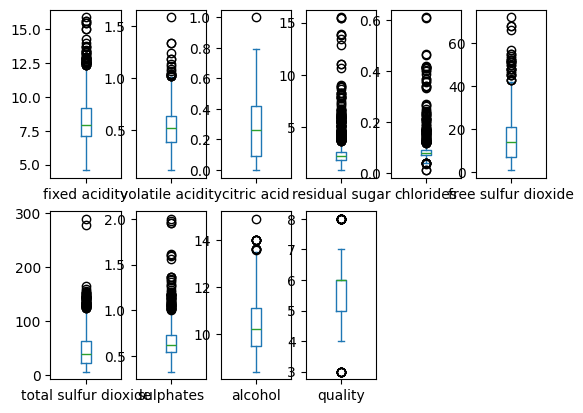

In [45]:
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show

In [46]:
df=df[(z<3).all(axis=1)]

<function matplotlib.pyplot.show(close=None, block=None)>

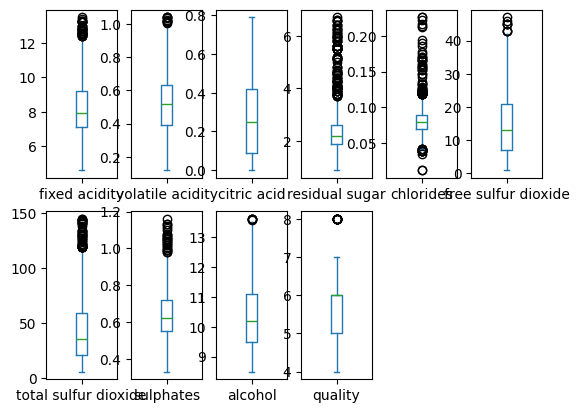

In [47]:
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show

In [48]:
df.shape

(1465, 10)

# Correlation

In [49]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,8.292491,0.522734,0.264976,2.388259,0.081186,15.178840,44.035495,0.641802,10.438020,5.662799
std,1.659168,0.169052,0.190714,0.872740,0.021216,9.343591,29.581532,0.129776,1.036677,0.782066
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,59.000000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.160000,13.600000,8.000000


In [50]:
#checking the correlation between target variables and independent variables 
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
fixed acidity,1.000000,-0.288724,0.694709,0.186178,0.198507,-0.151496,-0.104238,0.203046,-0.042327,0.137441
volatile acidity,-0.288724,1.000000,-0.587104,0.035796,0.081875,0.003280,0.101558,-0.336183,-0.215159,-0.354290
citric acid,0.694709,-0.587104,1.000000,0.188287,0.102888,-0.070494,0.008247,0.300656,0.159411,0.241752
residual sugar,0.186178,0.035796,0.188287,1.000000,0.136816,-0.002452,0.096531,0.080325,0.145222,0.056593
chlorides,0.198507,0.081875,0.102888,0.136816,1.000000,-0.072483,0.029686,0.035781,-0.224910,-0.115553
free sulfur dioxide,-0.151496,0.003280,-0.070494,-0.002452,-0.072483,1.000000,0.663151,0.045058,-0.062227,-0.061568
total sulfur dioxide,-0.104238,0.101558,0.008247,0.096531,0.029686,0.663151,1.000000,-0.048447,-0.236999,-0.229071
sulphates,0.203046,-0.336183,0.300656,0.080325,0.035781,0.045058,-0.048447,1.000000,0.224676,0.377561
alcohol,-0.042327,-0.215159,0.159411,0.145222,-0.224910,-0.062227,-0.236999,0.224676,1.000000,0.496402
quality,0.137441,-0.354290,0.241752,0.056593,-0.115553,-0.061568,-0.229071,0.377561,0.496402,1.000000


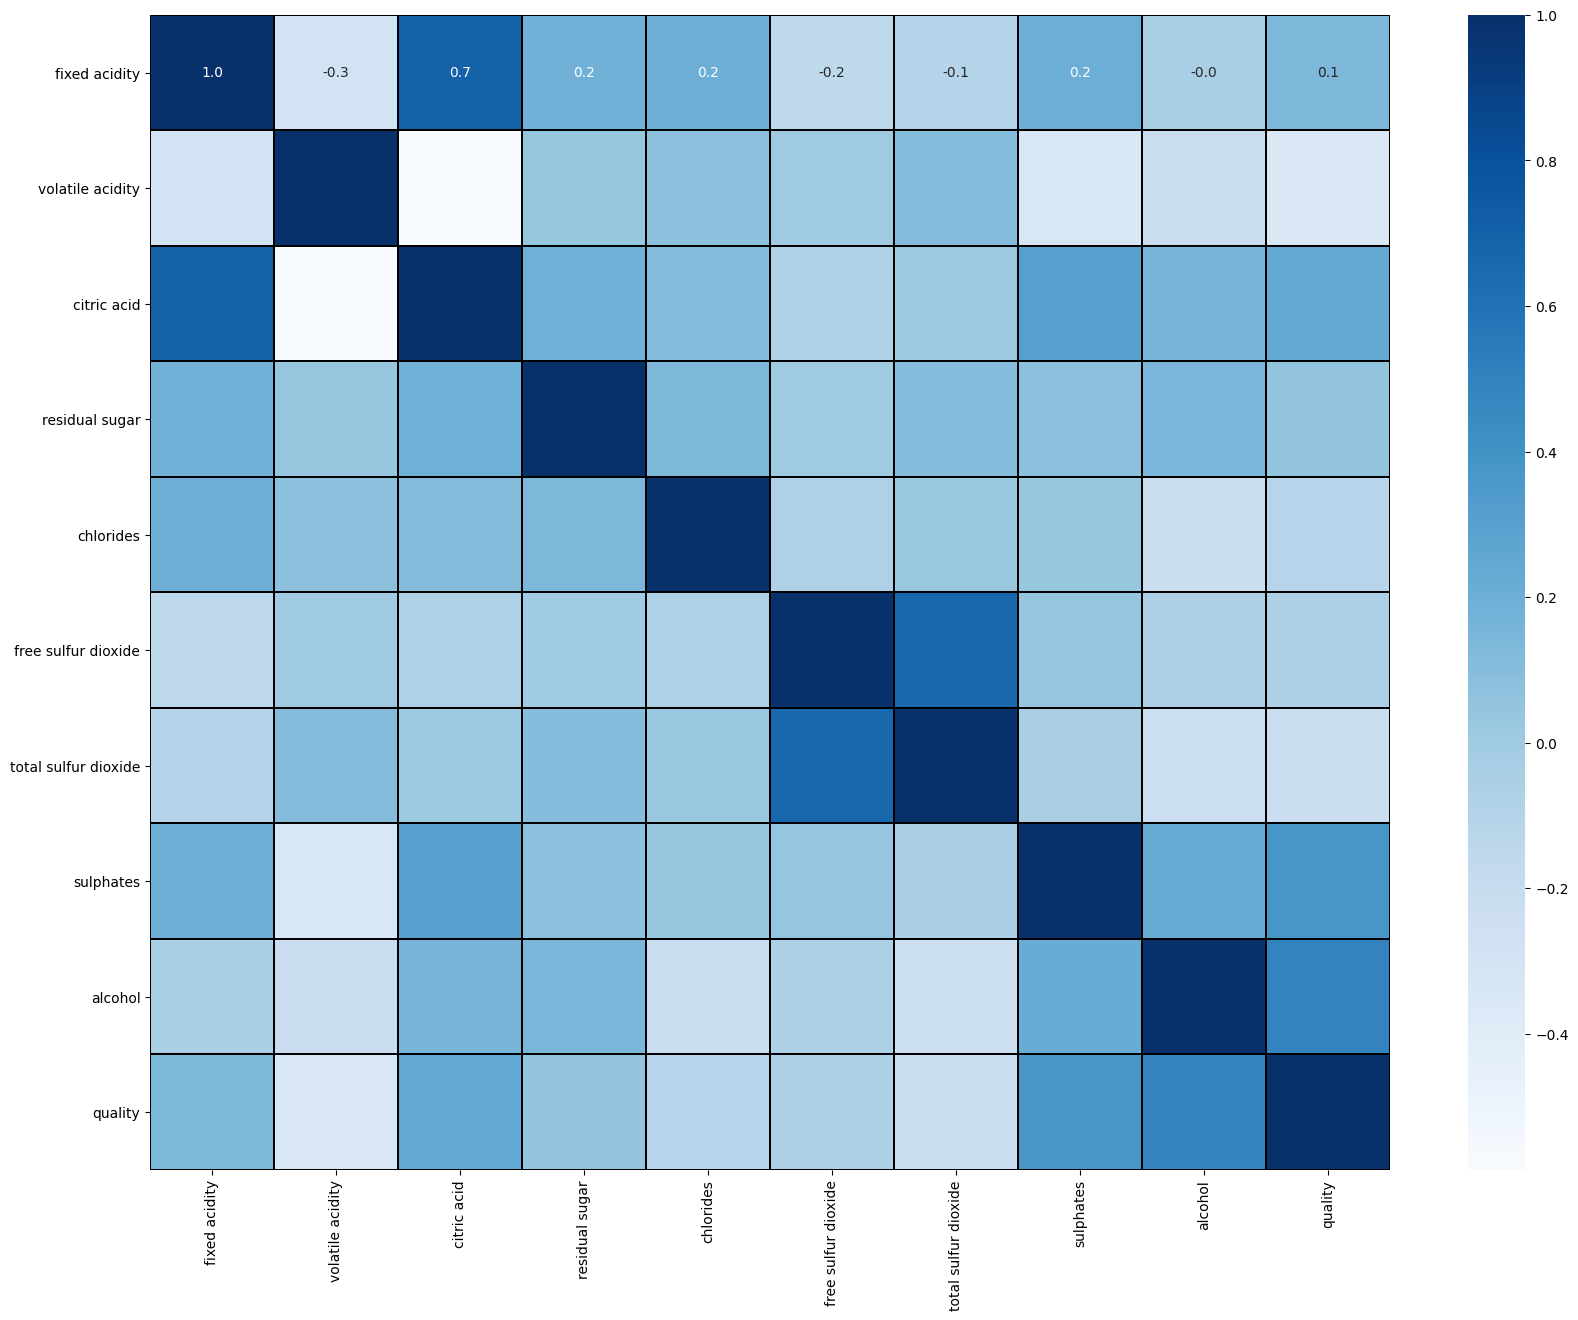

In [51]:
# Visualizing the correlation matrix by plotting a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1f", linecolor="black", annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.show()

free sulpher dioxide and total sulpher dioxide is corelated

<Axes: title={'center': 'Correlation with quality'}>

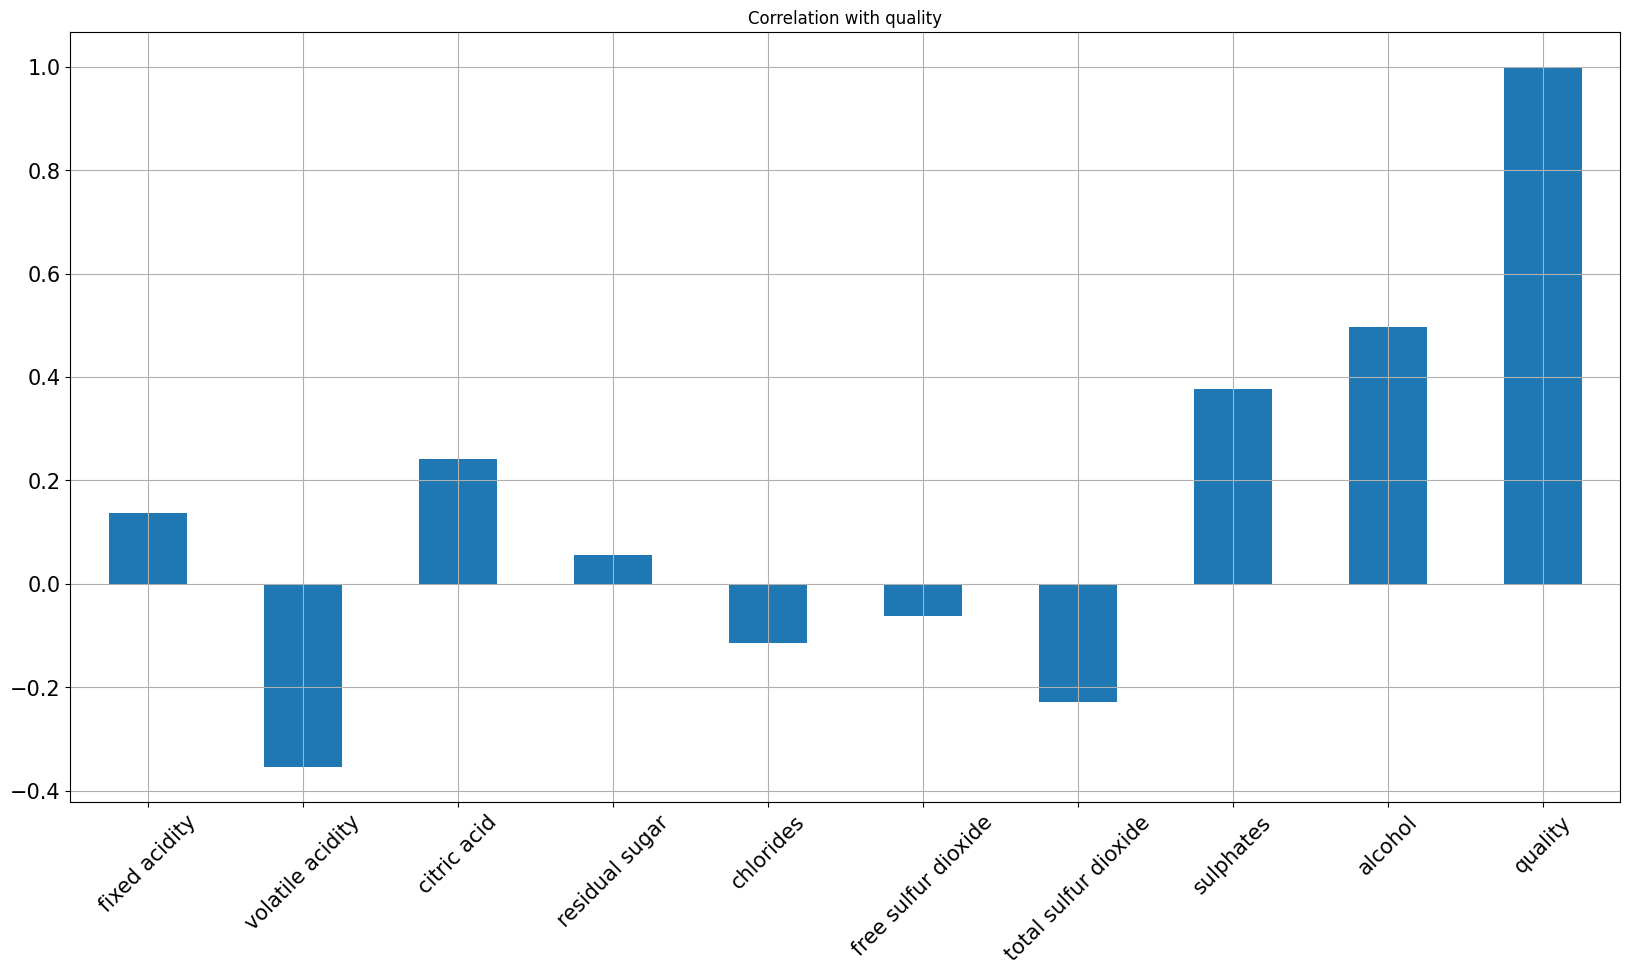

In [52]:
df.corrwith(df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

From the above bar plot, we can notice the positive and negative correlation between the feature and the target. Here the features Chloride and Residual sugar have very less correlation with the quality.

# Data Preprocessing

# Seprating features and label

In [20]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)

In [55]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (1025, 9)
y_train shape: (1025,)
x_test shape: (440, 9)
y_test.shape: (440,)


# Checking accuracy for RandomForestClassifier

In [37]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predRFC)*100)
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predRFC))
print("")
print("Classification Report:\n", classification_report(y_test, predRFC))

Accuracy: 64.58333333333334

Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 136  40   1   0]
 [  0   0  62 146  12   1]
 [  0   0   3  29  27   0]
 [  0   0   0   3   3   1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.64      0.77      0.70       177
           6       0.65      0.66      0.66       221
           7       0.63      0.46      0.53        59
           8       0.50      0.14      0.22         7

    accuracy                           0.65       480
   macro avg       0.40      0.34      0.35       480
weighted avg       0.62      0.65      0.63       480



# MultinomialNB

In [11]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
pred_MNB=MNB.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_MNB)*100)
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_MNB))
print("")
print("Classification Report:\n", classification_report(y_test, pred_MNB))

NameError: name 'x_train' is not defined

# K Neighbors Classification

In [22]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))
print("")
print("Classification Report:\n", classification_report(y_test, pred_knn))

Accuracy: 0.5041666666666667

Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   1   8   4   1   0]
 [  0   1 127  44   5   0]
 [  0   2 110  97  12   0]
 [  0   0  14  28  17   0]
 [  0   0   1   2   4   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.07      0.11        14
           5       0.49      0.72      0.58       177
           6       0.55      0.44      0.49       221
           7       0.44      0.29      0.35        59
           8       0.00      0.00      0.00         7

    accuracy                           0.50       480
   macro avg       0.29      0.25      0.25       480
weighted avg       0.49      0.50      0.48       480



# Support vector classifier

rbf

In [23]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)
predsvc_rbf=svc_rbf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_rbf))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_rbf))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_rbf))

Accuracy: 0.5270833333333333

Confusion Matrix:
 [[  0   0   0   2   0   0]
 [  0   0   4  10   0   0]
 [  0   0  96  81   0   0]
 [  0   0  65 156   0   0]
 [  0   0  10  48   1   0]
 [  0   0   0   7   0   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.55      0.54      0.55       177
           6       0.51      0.71      0.59       221
           7       1.00      0.02      0.03        59
           8       0.00      0.00      0.00         7

    accuracy                           0.53       480
   macro avg       0.34      0.21      0.20       480
weighted avg       0.56      0.53      0.48       480



linear

In [26]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(x_train,y_train)
predsvc_linar=svc_linear.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_linar))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_linar))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_linar))

Accuracy: 0.5479166666666667

Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   0  11   3   0   0]
 [  0   0 137  40   0   0]
 [  0   0  95 126   0   0]
 [  0   0   5  54   0   0]
 [  0   0   0   7   0   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.55      0.77      0.64       177
           6       0.55      0.57      0.56       221
           7       0.00      0.00      0.00        59
           8       0.00      0.00      0.00         7

    accuracy                           0.55       480
   macro avg       0.18      0.22      0.20       480
weighted avg       0.45      0.55      0.49       480



poly

In [27]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(x_train,y_train)
predsvc_poly=svc_poly.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_poly))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_poly))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_poly))

Accuracy: 0.5125

Confusion Matrix:
 [[  0   0   0   2   0   0]
 [  0   0   1  13   0   0]
 [  0   0  62 115   0   0]
 [  0   0  38 183   0   0]
 [  0   0   6  52   1   0]
 [  0   0   0   7   0   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.58      0.35      0.44       177
           6       0.49      0.83      0.62       221
           7       1.00      0.02      0.03        59
           8       0.00      0.00      0.00         7

    accuracy                           0.51       480
   macro avg       0.35      0.20      0.18       480
weighted avg       0.56      0.51      0.45       480



# DecisionTreeClassifier

In [28]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_dtc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dtc))
print("")
print("Classification Report:\n", classification_report(y_test, pred_dtc))

Accuracy: 0.5479166666666667

Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   2   6   4   2   0]
 [  0   7 110  49   9   2]
 [  0   5  66 124  23   3]
 [  0   0   8  24  25   2]
 [  0   0   0   3   2   2]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.14      0.14        14
           5       0.57      0.62      0.60       177
           6       0.61      0.56      0.58       221
           7       0.41      0.42      0.42        59
           8       0.22      0.29      0.25         7

    accuracy                           0.55       480
   macro avg       0.33      0.34      0.33       480
weighted avg       0.55      0.55      0.55       480



# ExtraTreesClassifier

In [38]:
EXC1=ExtraTreesClassifier()
EXC1.fit(x_train,y_train)
pred_EXC=RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_EXC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_EXC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_EXC))

Accuracy: 0.6458333333333334

Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 136  40   1   0]
 [  0   0  62 146  12   1]
 [  0   0   3  29  27   0]
 [  0   0   0   3   3   1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.64      0.77      0.70       177
           6       0.65      0.66      0.66       221
           7       0.63      0.46      0.53        59
           8       0.50      0.14      0.22         7

    accuracy                           0.65       480
   macro avg       0.40      0.34      0.35       480
weighted avg       0.62      0.65      0.63       480



# GradientBoostingClassifier

In [39]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_GBC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_GBC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_GBC))

Accuracy: 0.6125

Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   1  10   3   0   0]
 [  1   1 130  43   2   0]
 [  1   1  64 138  16   1]
 [  0   0   5  30  24   0]
 [  0   0   0   2   4   1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.07      0.12        14
           5       0.62      0.73      0.67       177
           6       0.64      0.62      0.63       221
           7       0.52      0.41      0.46        59
           8       0.50      0.14      0.22         7

    accuracy                           0.61       480
   macro avg       0.44      0.33      0.35       480
weighted avg       0.60      0.61      0.60       480



# AdaBoostClassifier

In [40]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_ABC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ABC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_ABC))

Accuracy: 0.5229166666666667

Confusion Matrix:
 [[  1   0   1   0   0   0]
 [  1   0  10   2   1   0]
 [  2   0 143  26   5   1]
 [  4   0 111  97   9   0]
 [  0   0  10  39  10   0]
 [  0   0   0   6   1   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.12      0.50      0.20         2
           4       0.00      0.00      0.00        14
           5       0.52      0.81      0.63       177
           6       0.57      0.44      0.50       221
           7       0.38      0.17      0.24        59
           8       0.00      0.00      0.00         7

    accuracy                           0.52       480
   macro avg       0.27      0.32      0.26       480
weighted avg       0.50      0.52      0.49       480



# BaggingClassifier

In [41]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_BC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_BC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_BC))

Accuracy: 0.6333333333333333

Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   1  10   2   1   0]
 [  0   2 132  42   1   0]
 [  0   0  66 144  11   0]
 [  0   0   3  30  26   0]
 [  0   0   0   0   6   1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.07      0.12        14
           5       0.62      0.75      0.68       177
           6       0.66      0.65      0.66       221
           7       0.58      0.44      0.50        59
           8       1.00      0.14      0.25         7

    accuracy                           0.63       480
   macro avg       0.53      0.34      0.37       480
weighted avg       0.63      0.63      0.62       480



# Conclusion: RandomForestClassifierworkingbest

# ________________________________________________________________

# Cross Validation Score

In [42]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.5375     0.565625   0.60625    0.578125   0.60188088]
0.5778761755485893
0.0679571577847441


In [43]:
print("Accuracy:", accuracy_score(y_test, predRFC)*100)

Accuracy: 64.58333333333334


# Saving the best model

In [44]:
import joblib
# Save the model as a objectfile

joblib.dump(RFC,'Red_Wine_Quality_Prediction')

['Red_Wine_Quality_Prediction']

In [53]:
Red_Wine_Quality_Prediction=joblib.load(open("Red_Wine_Quality_Prediction","rb"))

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
test = (11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.58, 9.8, 0.1, 0.2)  # Add two extra features
arr = np.asarray(test)
reshape = arr.reshape(1, -1)
pred = Red_Wine_Quality_Prediction.predict(reshape)
print(pred)

[6]


# **Model giving correct result**